In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from PIL import ImageDraw

def rle_to_mask(rle_string, width, height):
    '''
    convert RLE(run length encoding) string to numpy array

    Parameters: 
    rle_string (str): string of rle encoded mask
    height (int): height of the mask
    width (int): width of the mask

    Returns: 
    numpy.array: numpy array of the mask
    '''
    
    rows, cols = height, width
    
    if rle_string == -1:
        return np.zeros((height, width))
    else:
        rle_numbers = [int(num_string) for num_string in rle_string.split(' ')]
        rle_pairs = np.array(rle_numbers).reshape(-1,2)
        img = np.zeros(rows*cols, dtype=np.uint8)
        for index, length in rle_pairs:
            index -= 1
            img[index:index+length] = 255
        img = img.reshape(cols,rows)
        img = img.T
        return img
    
def bounding_box(img):
    # return max and min of a mask to draw bounding box
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    return [rmin, cmin, rmax, cmax]

def viz_apply_mask(img_path):
    img = Image.open(f'train_images/{img_path}')
    width, height = img.size
    subset_df = train_df[train_df['image'] == img_path]
    
    outline_dict = {'Gravel': 'red', 'Flower' : 'yellow', 'Sugar' : 'green', 'Fish' : 'blue'}
    
    masks = []
    colour = []
    draw = ImageDraw.Draw(img)
    for index, row in subset_df.iterrows():
        draw.rectangle(xy = bounding_box(rle_to_mask(row['EncodedPixels'], width, height)), 
                       outline=outline_dict[row['label']], 
                       width=10)
    return img

In [2]:
train_df = pd.read_csv('train.csv')
train_df['label'] = train_df['Image_Label'].apply(lambda x: x.split('_')[1])
train_df['image'] = train_df['Image_Label'].apply(lambda x: x.split('_')[0])
train_df = train_df.dropna(subset=['EncodedPixels'])

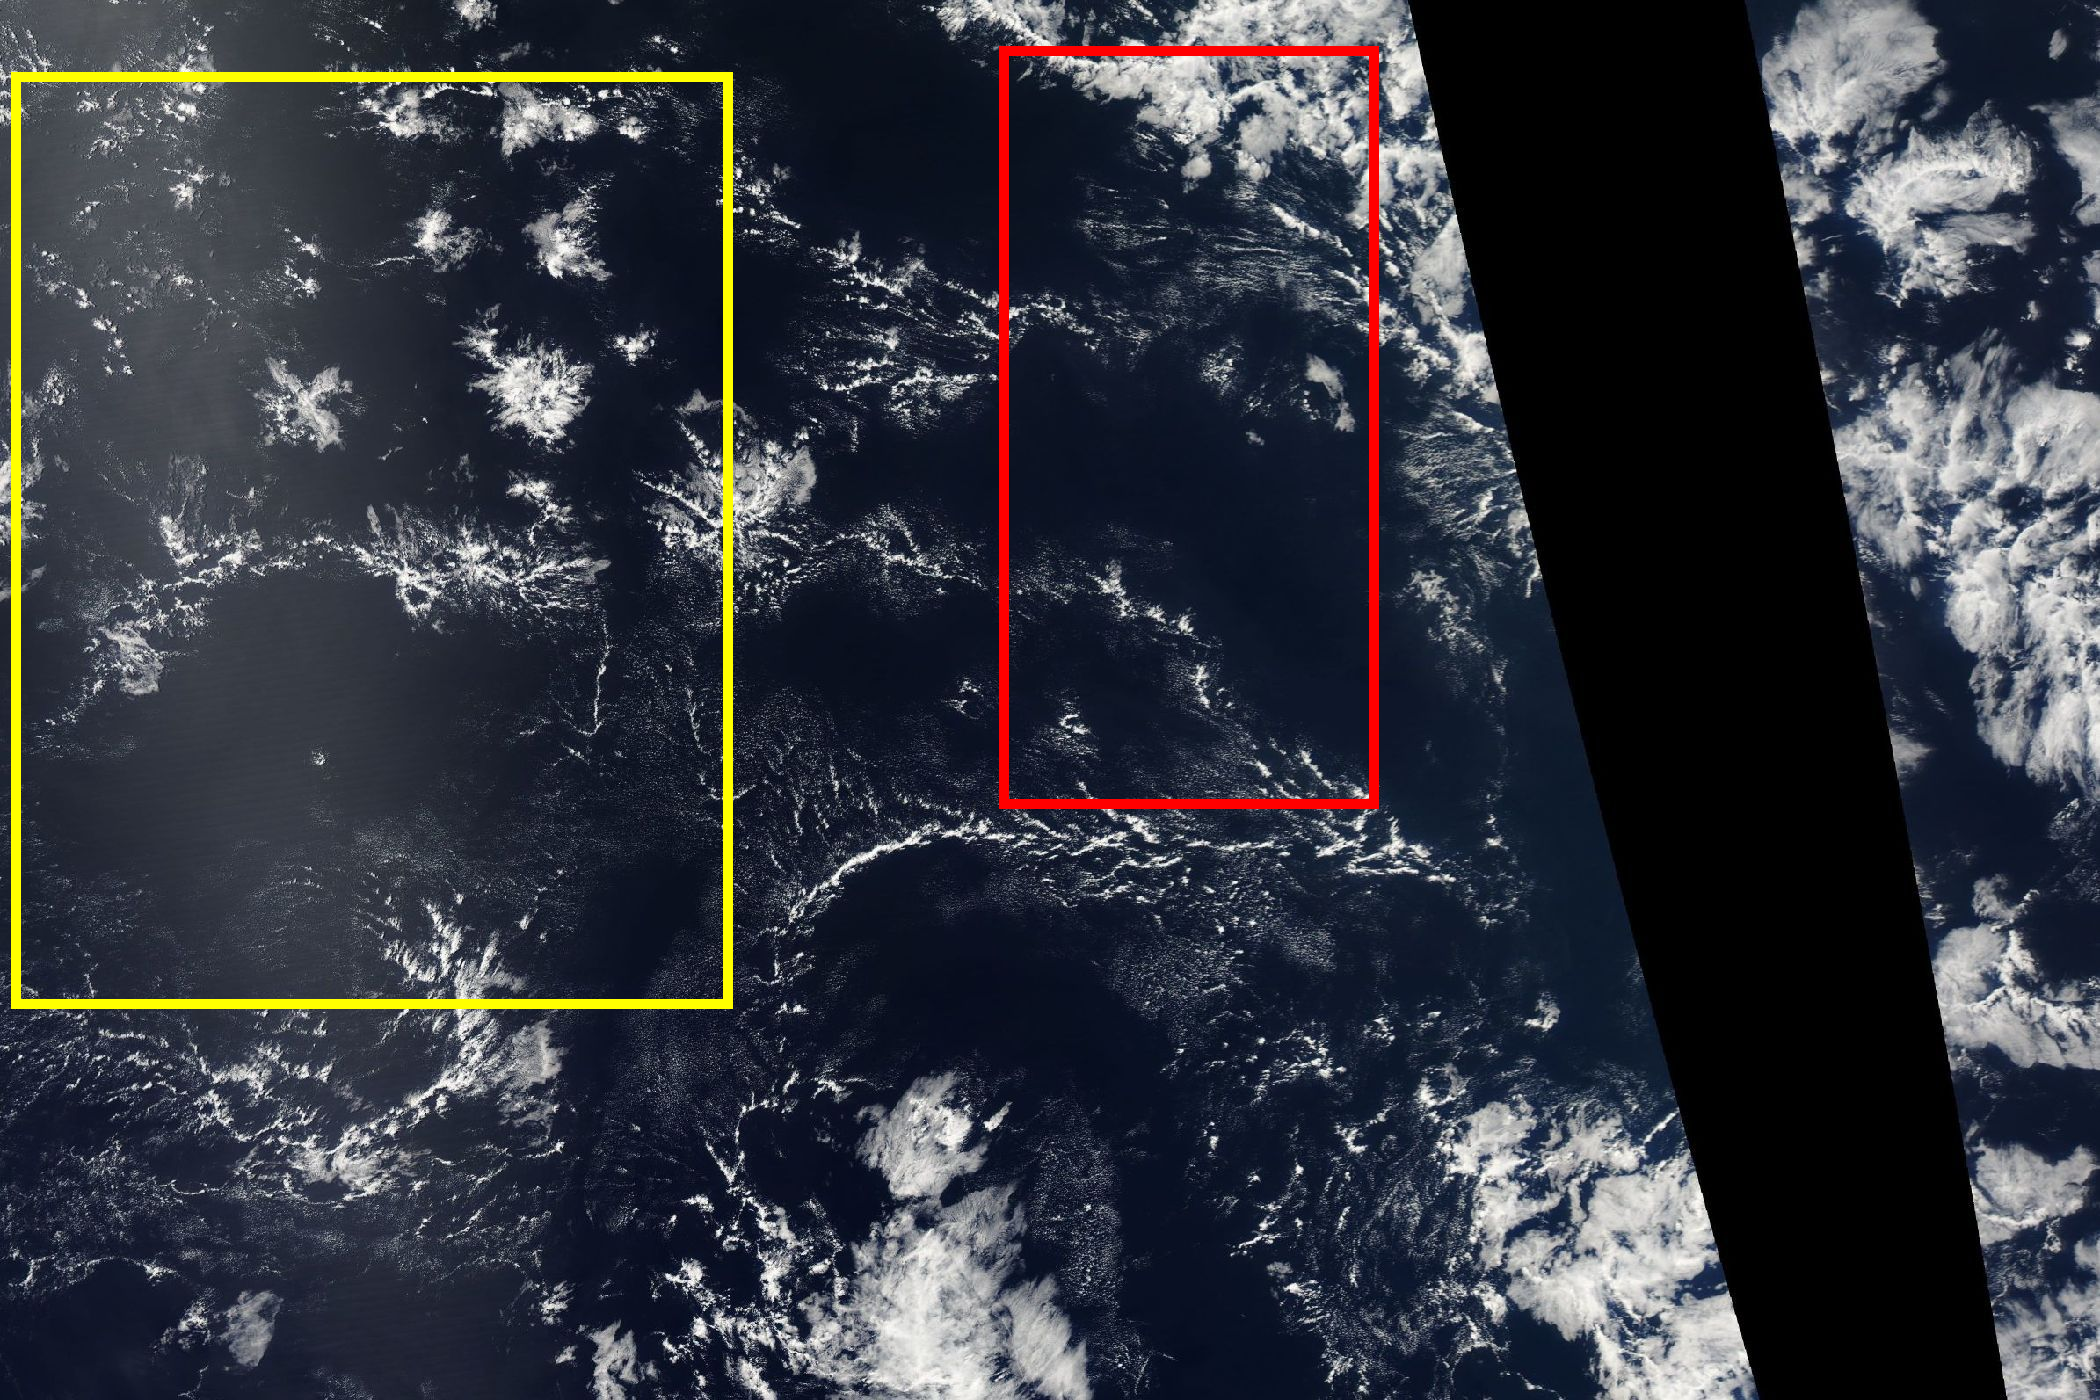

In [3]:
viz_apply_mask('0035239.jpg')